In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.svm import OneClassSVM
from sklearn.metrics import f1_score

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
data= pd.read_csv('/content/online_shoppers_intention.csv')
data.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
label="Revenue"
features=list(data.columns)
features.remove(label)
features

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

In [7]:
cat_features = []
for fet in features:
    if len(data[fet].value_counts()) <20:
        cat_features.append(fet)
cat_features

['Informational',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'VisitorType',
 'Weekend']

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

for c in cat_features:
    le = LabelEncoder()
    le.fit(data[c])
    data[c] = le.transform(data[c])





for i in cat_features:
  data = pd.get_dummies(data, prefix=[i], columns = [i])

## EDA

classes=list(data[label].unique())
classes

classes = pd.value_counts(data[label], sort = True)


Text(0, 0.5, 'Frequency')

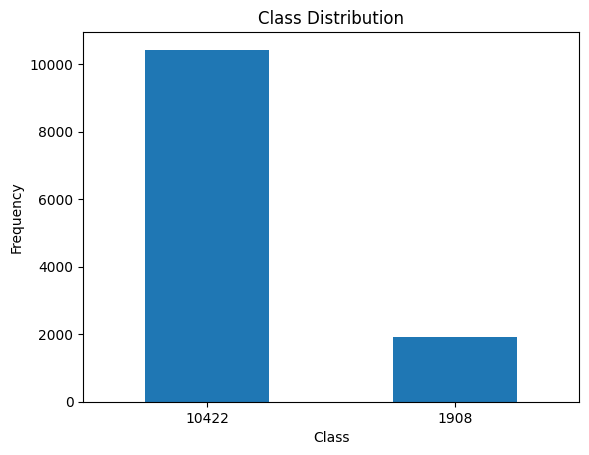

In [11]:
classes=list(data[label].unique())
classes

classes = pd.value_counts(data[label], sort = True)

classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")

plt.xticks(range(2), classes)

plt.xlabel("Class")

plt.ylabel("Frequency")



In [13]:
features=list(data.columns)
features.remove(label)
features

['Administrative',
 'Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'TrafficType',
 'Informational_0',
 'Informational_1',
 'Informational_2',
 'Informational_3',
 'Informational_4',
 'Informational_5',
 'Informational_6',
 'Informational_7',
 'Informational_8',
 'Informational_9',
 'Informational_10',
 'Informational_11',
 'Informational_12',
 'Informational_13',
 'Informational_14',
 'Informational_15',
 'Informational_16',
 'SpecialDay_0',
 'SpecialDay_1',
 'SpecialDay_2',
 'SpecialDay_3',
 'SpecialDay_4',
 'SpecialDay_5',
 'Month_0',
 'Month_1',
 'Month_2',
 'Month_3',
 'Month_4',
 'Month_5',
 'Month_6',
 'Month_7',
 'Month_8',
 'Month_9',
 'OperatingSystems_0',
 'OperatingSystems_1',
 'OperatingSystems_2',
 'OperatingSystems_3',
 'OperatingSystems_4',
 'OperatingSystems_5',
 'OperatingSystems_6',
 'OperatingSystems_7',
 'Browser_0',
 'Browser_1',
 'Browser_2',
 'Browser_3',
 'Browser

In [14]:
columns = data.columns.tolist()

# Define a random state
state = np.random.RandomState(42)
X = data[features]
Y = data[label]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(12330, 77)
(12330,)


In [15]:
from sklearn.model_selection import train_test_split
X, X_Test, Y,Y_Test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)


In [16]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
#gives model report in dataframe
def model_report(model,training_x,training_y,testing_x,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions)
    kappa_metric = cohen_kappa_score(testing_y,predictions)

    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Initialize the model
linear_reg_model = LinearRegression()

# Fit the model
linear_reg_model.fit(X, Y)

# Make predictions
linear_reg_predictions = linear_reg_model.predict(X_Test)
r_squared = r2_score(Y_Test, linear_reg_predictions)
print("R-squared score:", r_squared)

R-squared score: 0.28392950546170637


            Model  Accuracy_score  Recall_score  Precision  f1_score  \
0  KNN Classifier        0.861314      0.324607   0.596154  0.420339   

   Area_under_curve  Kappa_metric  
0           0.64215      0.349264  


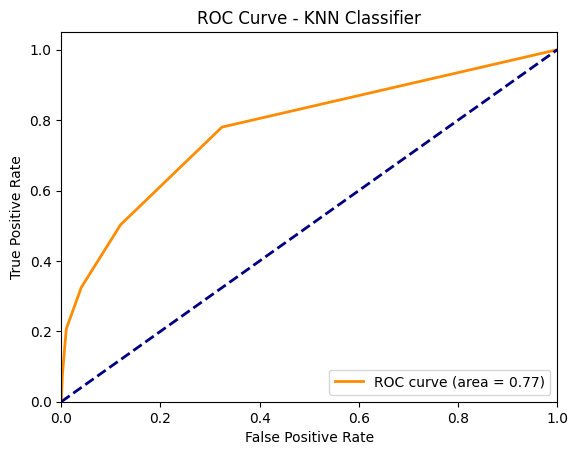

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

# Initialize the KNN classifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

# Fit the model
knn.fit(X, Y)

# Make predictions
knn_predictions = knn.predict(X_Test)

# Display model report
knn_report = model_report(knn, X, Y, X_Test, Y_Test, "KNN Classifier")
print(knn_report)

# Calculate the probability scores for each class
knn_probabilities = knn.predict_proba(X_Test)

# Calculate the false positive rate, true positive rate, and thresholds
fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y_Test, knn_probabilities[:, 1])

# Calculate the Area Under the ROC curve
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN Classifier')
plt.legend(loc="lower right")
plt.show()

In [31]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, accuracy_score

# Initialize the PLA model
pla_model = Perceptron()

# Fit the model
pla_model.fit(X, Y)

# Make predictions
pla_predictions = pla_model.predict(X_Test)

# Display model report
pla_report = model_report(pla_model, X, Y, X_Test, Y_Test, "Perceptron Learning Algorithm")
print(pla_report)

# Calculate accuracy
pla_accuracy = accuracy_score(Y_Test, pla_predictions)
print("Accuracy:", pla_accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(Y_Test, pla_predictions))



                           Model  Accuracy_score  Recall_score  Precision  \
0  Perceptron Learning Algorithm        0.253041      0.973822   0.168784   

   f1_score  Area_under_curve  Kappa_metric  
0  0.287703          0.547372      0.032142  
Accuracy: 0.25304136253041365
Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.12      0.21      2084
        True       0.17      0.97      0.29       382

    accuracy                           0.25      2466
   macro avg       0.57      0.55      0.25      2466
weighted avg       0.84      0.25      0.23      2466



                    Model  Accuracy_score  Recall_score  Precision  f1_score  \
0  Multi-Layer Perceptron        0.721006      0.863874   0.341615  0.489614   

   Area_under_curve  Kappa_metric  
0          0.779346      0.343962  


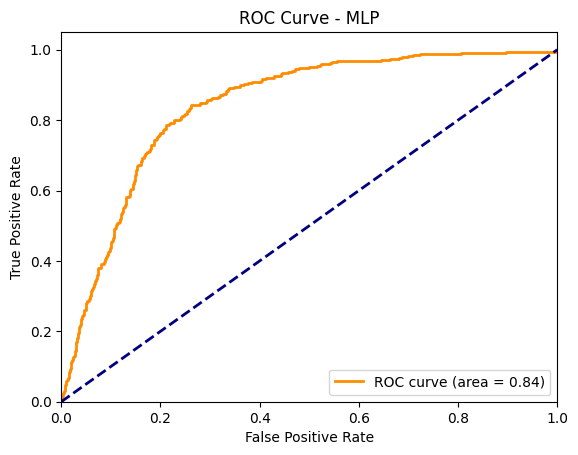

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve,auc

# Initialize the model
mlp_model = MLPClassifier(random_state=0)

# Fit the model
mlp_model.fit(X, Y)

# Make predictions
mlp_predictions = mlp_model.predict(X_Test)

# Display model report
mlp_report = model_report(mlp_model, X, Y, X_Test, Y_Test, "Multi-Layer Perceptron")
print(mlp_report)

# Calculate the probability scores for each class
mlp_probabilities = mlp_model.predict_proba(X_Test)

# Calculate the false positive rate, true positive rate, and thresholds
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(Y_Test, mlp_probabilities[:, 1])

# Calculate the Area Under the ROC curve
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plot ROC curve
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLP')
plt.legend(loc="lower right")
plt.show()

                    Model  Accuracy_score  Recall_score  Precision  f1_score  \
0  Support Vector Machine        0.848743       0.02356        1.0  0.046036   

   Area_under_curve  Kappa_metric  
0           0.51178      0.039184  


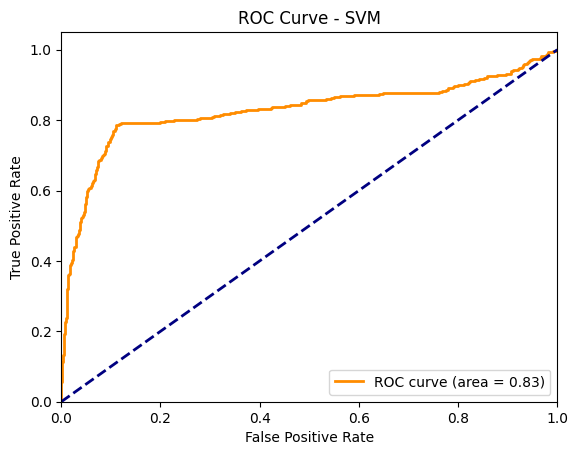

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

# Initialize the model
svm_model = SVC()

# Fit the model
svm_model.fit(X, Y)

# Make predictions
svm_predictions = svm_model.predict(X_Test)

# Display model report
svm_report = model_report(svm_model, X, Y, X_Test, Y_Test, "Support Vector Machine")
print(svm_report)

# Calculate the decision function scores
svm_scores = svm_model.decision_function(X_Test)

# Calculate the false positive rate, true positive rate, and thresholds
fpr_svm, tpr_svm, thresholds_svm = roc_curve(Y_Test, svm_scores)

# Calculate the Area Under the ROC curve
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc="lower right")
plt.show()

         Model  Accuracy_score  Recall_score  Precision  f1_score  \
0  Naive Bayes        0.735604      0.704188   0.332921  0.452101   

   Area_under_curve  Kappa_metric  
0          0.722776       0.30614  


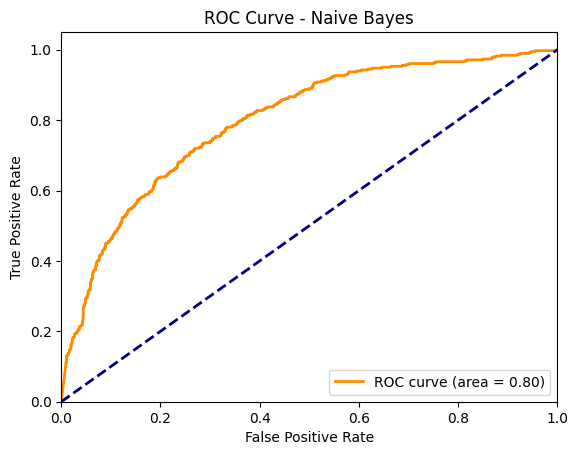

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

# Initialize the model
naive_bayes_model = GaussianNB()

# Fit the model
naive_bayes_model.fit(X, Y)

# Make predictions
naive_bayes_predictions = naive_bayes_model.predict(X_Test)

# Display model report
naive_bayes_report = model_report(naive_bayes_model, X, Y, X_Test, Y_Test, "Naive Bayes")
print(naive_bayes_report)

# Calculate the probability scores for each class
naive_bayes_probabilities = naive_bayes_model.predict_proba(X_Test)

# Calculate the false positive rate, true positive rate, and thresholds
fpr_nb, tpr_nb, thresholds_nb = roc_curve(Y_Test, naive_bayes_probabilities[:, 1])

# Calculate the Area Under the ROC curve
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

MLP:(MULTI LAYER PERCEPTRON)
The ROC curve for the ,MLP model shows good performance.But since there is slight gap between AUC scores of testing and training inducates some overfitting.

SVM(SUPPORT VECTOR MACHINE):
The AUC scores for both testing and training are close,thus no overfitting.

NAIVE BAYES:
Decent performance through ROC curve and no significant difference between AUC scores of training and testing,thus no overfitting.

KNN:
Minimal difference between AUC scores of training and testing scores.Thus very minimal overfitting.

LINEAR REGRESSION:
TPR and FPR do not exisit for regression models.Thus ROC curve is not possible.

Based on accuracy,SVM and KNN had the best scores and thus had the best performance.

-------

**Ignoring the class label and performing K-Means clustering and displaying the performance.**

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Initialize the KMeans model
kmeans_model = KMeans(n_clusters=5, random_state=0)

# Fit the model
kmeans_model.fit(X)

# Calculate clustering evaluation metrics
silhouette = silhouette_score(X, kmeans_model.labels_)
davies_bouldin = davies_bouldin_score(X, kmeans_model.labels_)
calinski_harabasz = calinski_harabasz_score(X, kmeans_model.labels_)

# Print clustering evaluation metrics
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.6258771927893045
Davies-Bouldin Index: 0.5279561298341235
Calinski-Harabasz Index: 19855.39992721202
